In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.datasets import make_classification,make_regression
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier

In [2]:
fv,cv = make_classification(n_samples = 1000,
                            n_features = 2,
                            n_informative = 2,
                            n_redundant = 0,
                            n_repeated = 0,
                            n_classes = 2,
                            n_clusters_per_class = 1,
                            weights = [0.5,0.5],
                            class_sep = 0.8,
                            random_state = 3)

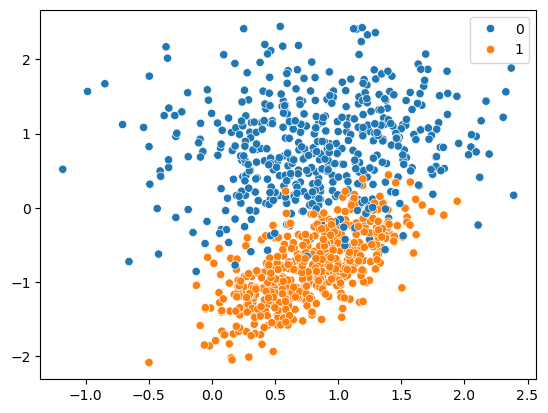

In [5]:
sns.scatterplot(x = fv[:,0],y =fv[:,1],hue = cv)
plt.show()

In [7]:
x_train,x_test,y_train,y_test = train_test_split(fv,cv,test_size =0.2,stratify = cv)

In [9]:
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [13]:
vc = VotingClassifier(estimators=[("knn",KNeighborsClassifier(n_neighbors = 10)),("dt",DecisionTreeClassifier()),("lr",LogisticRegression())],voting = "hard")

In [15]:
vc

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=10)),
                             ('dt', DecisionTreeClassifier()),
                             ('lr', LogisticRegression())])

In [17]:
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=10)),
                             ('dt', DecisionTreeClassifier()),
                             ('lr', LogisticRegression())])

In [19]:
vc.predict([[3.2,4.0]])

array([0])

In [21]:
vc.estimators_

[KNeighborsClassifier(n_neighbors=10),
 DecisionTreeClassifier(),
 LogisticRegression()]

In [23]:
vc.estimators_[0].predict([[3.2,4.0]])

array([0], dtype=int64)

In [25]:
vc.estimators_[1].predict([[3.2,4.0]])

array([0], dtype=int64)

In [27]:
vc.estimators_[2].predict([[3.2,4.0]])

array([0], dtype=int64)

In [33]:
vc1 = VotingClassifier(estimators=[("knn",KNeighborsClassifier(n_neighbors = 10)),("dt",DecisionTreeClassifier()),("lr",LogisticRegression())],voting = "soft")

In [35]:
vc1

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=10)),
                             ('dt', DecisionTreeClassifier()),
                             ('lr', LogisticRegression())],
                 voting='soft')

In [37]:
vc1.fit(x_train,y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=10)),
                             ('dt', DecisionTreeClassifier()),
                             ('lr', LogisticRegression())],
                 voting='soft')

In [65]:
vc1.predict([[4.2,9.0]])

array([0])

In [88]:
import numpy as np
np.argmax(vc1.predict_proba([[4.2,9.0]]))

0

In [90]:
vc1.predict_proba([[4.2,9.0]])

array([[1.00000000e+00, 7.51325123e-20]])

In [80]:
vc1.estimators_

[KNeighborsClassifier(n_neighbors=10),
 DecisionTreeClassifier(),
 LogisticRegression()]

In [82]:
vc1.estimators_[0].predict_proba([[4.2,9.0]])

array([[1., 0.]])

In [84]:
vc1.estimators_[1].predict_proba([[4.2,9.0]])

array([[1., 0.]])

In [86]:
vc1.estimators_[2].predict_proba([[4.2,9.0]])

array([[1.00000000e+00, 2.25397537e-19]])

### Regression

In [56]:
fv1,cv1 = make_regression(n_samples = 1000,
                            n_features = 2,
                            random_state = 3)

In [58]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(fv1,cv1,test_size =0.1)

In [60]:
std = StandardScaler()
x_train1 = std.fit_transform(x_train1)
x_test1 = std.transform(x_test1)

In [92]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [94]:
from sklearn.ensemble import VotingRegressor

In [96]:
vr = VotingRegressor(estimators = [("knn",KNeighborsRegressor(n_neighbors = 5)),("dt",DecisionTreeRegressor()),("lr",LinearRegression())]) 

In [98]:
vr

VotingRegressor(estimators=[('knn', KNeighborsRegressor()),
                            ('dt', DecisionTreeRegressor()),
                            ('lr', LinearRegression())])

In [63]:
vr.fit(x_train1,y_train1)

VotingRegressor(estimators=[('knn', KNeighborsRegressor()),
                            ('dt', DecisionTreeRegressor()),
                            ('lr', LinearRegression())])

In [65]:
vr.predict([[2.3,4.5]])

array([345.382389])

In [67]:
vr.estimators_

[KNeighborsRegressor(), DecisionTreeRegressor(), LinearRegression()]

In [69]:
vr.estimators_[0].predict([[2.3,4.5]])

array([257.69689647])

In [71]:
vr.estimators_[1].predict([[2.3,4.5]])

array([316.51269486])

In [73]:
vr.estimators_[2].predict([[2.3,4.5]])

array([461.93757566])

In [100]:
import optuna

In [122]:
def objective(trial):


  t1=trial.suggest_int("k1",1,20)
  w1=trial.suggest_categorical("weight",["uniform","distance"])
  model1=KNeighborsClassifier(n_neighbors=t1,weights=w1)

  t2=trial.suggest_int("k2",20,50)
  w2=trial.suggest_categorical("weight",["uniform","distance"])
  model2 = KNeighborsClassifier(n_neighbors=t2,weights=w2)

  t3 = trial.suggest_int("d1",1,20)
  model3 = DecisionTreeClassifier(max_depth = t3)

  t4 = trial.suggest_int("d2",20,30)
  model4 = DecisionTreeClassifier(max_depth = t4)

  
  vr = VotingClassifier(estimators = [("m1",model1),("m2",model2),("m3",model3),("m4",model4)],voting = "soft") 

  cross_val =cross_validate(estimator=vr,X=x_train,y=y_train,cv=3,scoring="accuracy",return_train_score=True)

  trial.set_user_attr("training accuracy",cross_val["train_score"].mean())

  return np.mean(cross_val["test_score"])

In [124]:
study=optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler())

[I 2025-02-12 18:23:09,678] A new study created in memory with name: no-name-6750ad36-a183-4dfc-ab08-507d81d490bf


In [126]:
study.optimize(objective,n_trials=5)

[I 2025-02-12 18:23:10,421] Trial 0 finished with value: 0.9137497301305699 and parameters: {'k1': 2, 'weight': 'uniform', 'k2': 35, 'd1': 16, 'd2': 20}. Best is trial 0 with value: 0.9137497301305699.
[I 2025-02-12 18:23:10,506] Trial 1 finished with value: 0.9350107478433912 and parameters: {'k1': 7, 'weight': 'uniform', 'k2': 21, 'd1': 4, 'd2': 25}. Best is trial 1 with value: 0.9350107478433912.
[I 2025-02-12 18:23:10,596] Trial 2 finished with value: 0.9162513024133366 and parameters: {'k1': 15, 'weight': 'distance', 'k2': 29, 'd1': 17, 'd2': 24}. Best is trial 1 with value: 0.9350107478433912.
[I 2025-02-12 18:23:10,690] Trial 3 finished with value: 0.9350201346061784 and parameters: {'k1': 13, 'weight': 'uniform', 'k2': 40, 'd1': 1, 'd2': 21}. Best is trial 3 with value: 0.9350201346061784.
[I 2025-02-12 18:23:10,774] Trial 4 finished with value: 0.9400185857903186 and parameters: {'k1': 2, 'weight': 'uniform', 'k2': 25, 'd1': 2, 'd2': 22}. Best is trial 4 with value: 0.94001858

In [128]:
study.best_params

{'k1': 2, 'weight': 'uniform', 'k2': 25, 'd1': 2, 'd2': 22}

In [136]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_d1,params_d2,params_k1,params_k2,params_weight,user_attrs_training accuracy,state
0,0,0.913750,2025-02-12 18:23:10.310550,2025-02-12 18:23:10.421286,0 days 00:00:00.110736,16,20,2,35,uniform,1.000000,COMPLETE
1,1,0.935011,2025-02-12 18:23:10.422225,2025-02-12 18:23:10.506479,0 days 00:00:00.084254,4,25,7,21,uniform,0.973752,COMPLETE
2,2,0.916251,2025-02-12 18:23:10.508541,2025-02-12 18:23:10.596090,0 days 00:00:00.087549,17,24,15,29,distance,1.000000,COMPLETE
3,3,0.935020,2025-02-12 18:23:10.605973,2025-02-12 18:23:10.690100,0 days 00:00:00.084127,1,21,13,40,uniform,0.959375,COMPLETE
4,4,0.940019,2025-02-12 18:23:10.692056,2025-02-12 18:23:10.774907,0 days 00:00:00.082851,2,22,2,25,uniform,0.978122,COMPLETE
